In [48]:
import time
import os


import numpy as np
import pandas as pd

import datetime as dt
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV,train_test_split



from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [49]:
from sklearn import preprocessing


import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [50]:
path = 'max_data/SixAirlinesDataV2.csv'
data = pd.read_csv(path, sep = ',', na_filter = False)
#data = data.set_index('id')
data=data.drop(columns='Unnamed: 0')
data.head()

,Airline,Aircraft,FlightDuration,IsInternational,SeatsEconomy,SeatsPremium,PitchEconomy,PitchPremium,WidthEconomy,WidthPremium,PriceEconomy,PricePremium,PriceRelative,SeatsTotal,PitchDifference,WidthDifference,PercentPremiumSeats,month_num
0,0.089142,-0.693889,-0.817844,3.294215,-0.436182,-0.343385,1.220342,-2.215259,0.302148,-1.357472,-0.578401,-0.802415,0.06,-0.442612,-2.091811,-1.381970,0.009871,-1.639972
1,0.089142,-0.693889,-0.783876,3.294215,-1.029628,-1.147585,1.220342,-2.968588,-1.455802,-2.258698,-0.667926,-0.870953,0.07,-1.098823,-2.650559,-1.381970,-0.411592,-1.639972
2,0.648468,-0.693889,-1.199981,-0.303562,-0.554871,-1.878677,-1.818641,1.551387,-1.455802,1.346207,-1.010589,-1.018270,0.65,-0.794154,1.819422,1.912112,-2.053194,0.282340
3,0.089142,1.441153,-1.542489,3.294215,-1.108754,-1.147585,1.220342,-2.968588,-1.455802,-2.258698,-1.141274,-1.256183,0.09,-1.169131,-2.650559,-1.381970,-0.297797,0.282340
4,1.207793,-0.693889,-0.161134,-0.303562,-0.053740,-0.416494,1.220342,0.044729,-1.455802,-0.456246,1.630900,1.014233,0.07,-0.114507,-0.415569,0.265071,-0.457953,-0.678816


In [51]:
# variables seleccionadas según diferentes criterios  根据不同标准选择变量
Y = data[['PriceEconomy']].copy()
Y = Y.values
X = data.drop(columns = ['PriceEconomy']).copy()
X = X.values

In [52]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [53]:
# shuffle and split data into train (~80%) and test (~20%)
X_train, X_test, y_train, y_test = train_test_split(X_scale, Y, 
                                                    test_size=0.2, random_state=42) 

print('training data shape: ',X_train.shape)
print('testing data shape: ',X_test.shape)

training data shape:  (256, 17)
testing data shape:  (64, 17)


In [54]:

#get number of columns in training data
n_cols = X_train.shape[1]

# builds model
model = keras.Sequential()

model.add(keras.layers.Dense(150, activation=tf.nn.relu, 
                       input_shape=(n_cols,)))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(1))

#compile model
model.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

#inspect the model
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 150)               2700      
_________________________________________________________________
dense_31 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_32 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_33 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_34 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 151       
Total params: 93,451
Trainable params: 93,451
Non-trainable params: 0
__________________________________________________

In [55]:
t_beg = time.time()
#train model and perform validation test

early_stop = EarlyStopping(monitor='val_loss', patience=15) # stops training when it doesn't show improvemnet.

history = model.fit(X_train, y_train, epochs=300, 
          validation_split=0.2, verbose=1, callbacks=[early_stop])


selection_time = time.time() - t_beg
print(f"选择时间为: {selection_time:0.3f} s")

Train on 204 samples, validate on 52 samples
Epoch 1/300
204/204 [==============================] - 0s 1ms/sample - loss: 0.8413 - mean_absolute_error: 0.7735 - val_loss: 0.6056 - val_mean_absolute_error: 0.6374
Epoch 2/300
204/204 [==============================] - 0s 68us/sample - loss: 0.4598 - mean_absolute_error: 0.5392 - val_loss: 0.2516 - val_mean_absolute_error: 0.3637
Epoch 3/300
204/204 [==============================] - 0s 78us/sample - loss: 0.2008 - mean_absolute_error: 0.3722 - val_loss: 0.1501 - val_mean_absolute_error: 0.2799
Epoch 4/300
204/204 [==============================] - 0s 88us/sample - loss: 0.0824 - mean_absolute_error: 0.2079 - val_loss: 0.0920 - val_mean_absolute_error: 0.2361
Epoch 5/300
204/204 [==============================] - 0s 83us/sample - loss: 0.0708 - mean_absolute_error: 0.2115 - val_loss: 0.0728 - val_mean_absolute_error: 0.2206
Epoch 6/300
204/204 [==============================] - 0s 83us/sample - loss: 0.0587 - mean_absolute_error: 0.1834 -

Epoch 49/300
204/204 [==============================] - 0s 69us/sample - loss: 0.0023 - mean_absolute_error: 0.0347 - val_loss: 0.0072 - val_mean_absolute_error: 0.0688
Epoch 50/300
204/204 [==============================] - 0s 64us/sample - loss: 0.0055 - mean_absolute_error: 0.0599 - val_loss: 0.0127 - val_mean_absolute_error: 0.0917
Epoch 51/300
204/204 [==============================] - 0s 69us/sample - loss: 0.0121 - mean_absolute_error: 0.0900 - val_loss: 0.0059 - val_mean_absolute_error: 0.0614
Epoch 52/300
204/204 [==============================] - 0s 63us/sample - loss: 0.0122 - mean_absolute_error: 0.0874 - val_loss: 0.0080 - val_mean_absolute_error: 0.0756
Epoch 53/300
204/204 [==============================] - 0s 64us/sample - loss: 0.0046 - mean_absolute_error: 0.0529 - val_loss: 0.0052 - val_mean_absolute_error: 0.0578
Epoch 54/300
204/204 [==============================] - 0s 68us/sample - loss: 0.0053 - mean_absolute_error: 0.0565 - val_loss: 0.0048 - val_mean_absolute_

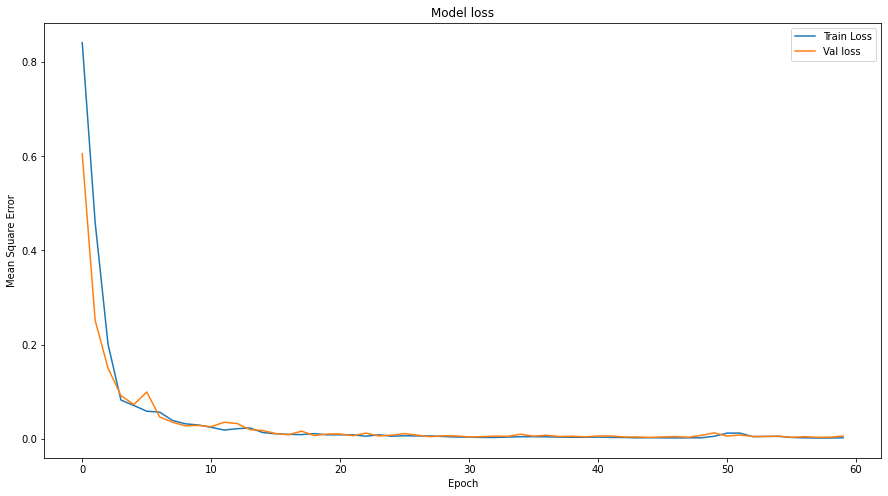

In [56]:
# show the graph of model loss in trainig and validation 

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()
plt.savefig('Figures/model_loss_0.png',dpi=1000,bbox_inches='tight')

In [57]:
#check the model performace in test dataset
score = model.evaluate(X_test, y_test, verbose=1)

print('loss value: ', score[0])
print('Mean absolute error: ', score[1])



64/64 [==============================] - 0s 47us/sample - loss: 0.0158 - mean_absolute_error: 0.0969
loss value:  0.015798100270330906
Mean absolute error:  0.09694817


In [58]:
'''=== predict the house price ==='''

# predict house price using the test data 
test_predictions = model.predict(X_test).flatten()
print(test_predictions)

mse = mean_squared_error(y_test,test_predictions)
r2 = r2_score(y_test, test_predictions, multioutput='uniform_average')
print("mse:", mse)
print("r2:", r2)

[ 1.8646152   0.42654845  1.6028925  -0.5239123   0.7530769   1.3987733
  1.8668773  -0.89880085  0.47774953  0.6583003  -0.9622763   0.79971373
 -0.88247216 -1.0182515  -0.86181444  1.46811     1.7885122   1.2747676
  0.4490513   0.35625055 -1.0284019  -0.92936265 -1.1527331  -0.9476342
 -0.90493214  1.2022009  -1.083152    1.0791981   0.58610016 -0.8246086
  0.35667107 -0.7197754   1.4523262   1.9718958  -0.02673357 -1.0543221
  2.1040578   1.047332   -0.59378654  2.1576862   0.5901563  -0.37982067
  1.9158765  -0.6996754  -0.6713593  -0.9454851  -1.1098256  -0.66128737
  1.4399575   0.2774426  -1.0399283   0.3919951  -0.9260007  -1.1289068
 -1.1315534   0.7083814   0.7069599  -0.6228744  -1.1718429  -0.5673239
  1.0623735   1.6131668  -0.16501676  0.06899634]
mse: 0.015798105019108534
r2: 0.9872113211413961


In [59]:
# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)), 
                    columns=['True Value','Predicted Value'])
true_predicted.head(10)

,True Value,Predicted Value
0,[1.9962017456503172],1.864615
1,[0.5514604154564543],0.426548
2,[1.5825364929879715],1.602893
3,[-0.7564215152247422],-0.523912
4,[0.5535184515393514],0.753077
5,[1.7533534878684431],1.398773
6,[1.8017173358165282],1.866877
7,[-1.0229371879599352],-0.898801
8,[0.4742840623478076],0.477750
9,[0.6625943639329053],0.658300


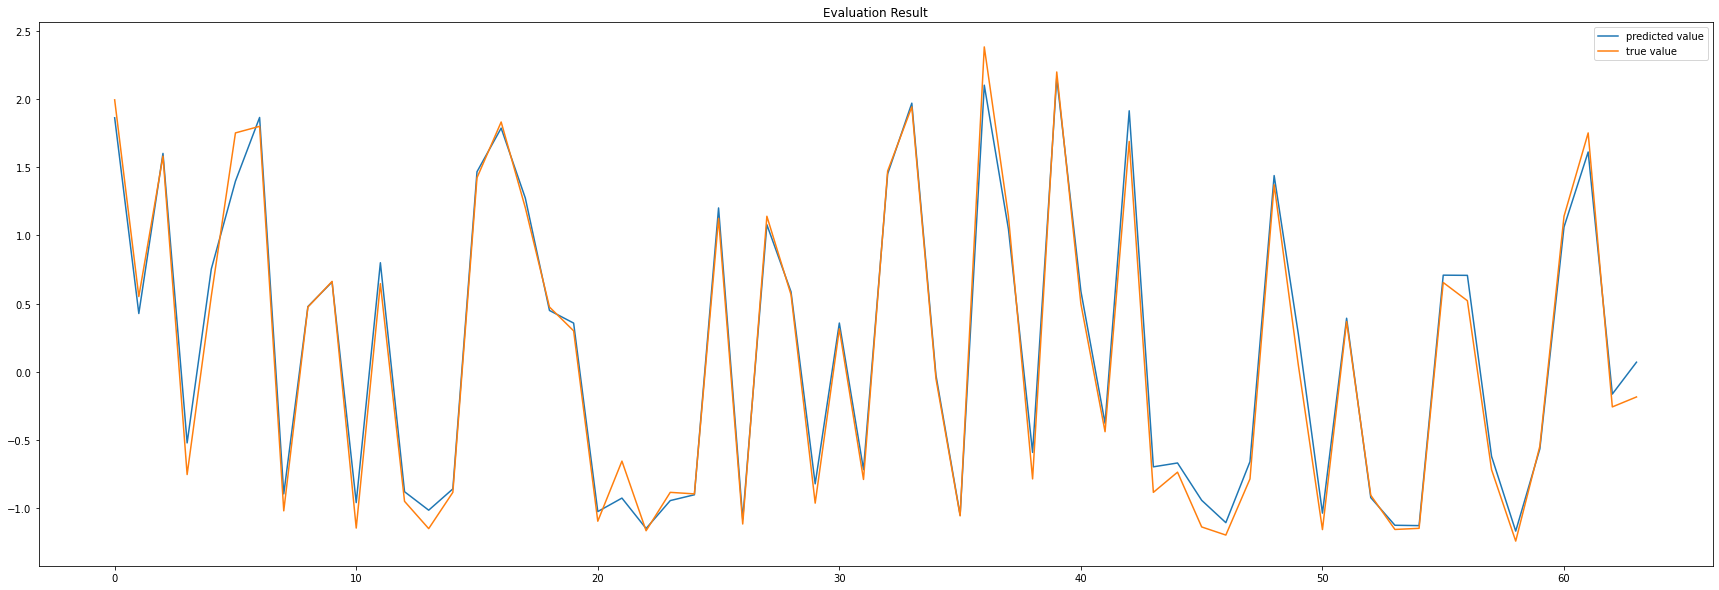

In [60]:
#visiulize the true value with predicted value (using line graph)
x = test_predictions
y = y_test
plt.figure(figsize=(30,10))
plt.plot(x, label='predicted value')
plt.plot(y, label='true value')
plt.title('Evaluation Result')
plt.legend()
plt.savefig('Evaluation_Result_0.png',dpi=1000,bbox_inches='tight')
plt.show()


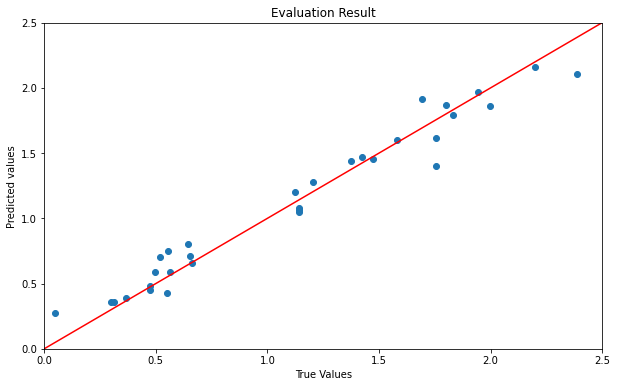

In [61]:
'''=== Visualize the model evaluation skill ==='''


# visualize the prediction uisng diagonal line
y = test_predictions #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,2.5), ylim=(0, 2.5)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.savefig('x_Evaluation_Result_0.png',dpi=1000,bbox_inches='tight')
plt.show()

## subset_1

In [62]:
path = 'max_data/SixAirlinesDataV2.csv'
data_1 = pd.read_csv(path, sep = ',', na_filter = False)

data_1=data_1.drop(columns='Unnamed: 0')
data_1.head()

,Airline,Aircraft,FlightDuration,IsInternational,SeatsEconomy,SeatsPremium,PitchEconomy,PitchPremium,WidthEconomy,WidthPremium,PriceEconomy,PricePremium,PriceRelative,SeatsTotal,PitchDifference,WidthDifference,PercentPremiumSeats,month_num
0,0.089142,-0.693889,-0.817844,3.294215,-0.436182,-0.343385,1.220342,-2.215259,0.302148,-1.357472,-0.578401,-0.802415,0.06,-0.442612,-2.091811,-1.381970,0.009871,-1.639972
1,0.089142,-0.693889,-0.783876,3.294215,-1.029628,-1.147585,1.220342,-2.968588,-1.455802,-2.258698,-0.667926,-0.870953,0.07,-1.098823,-2.650559,-1.381970,-0.411592,-1.639972
2,0.648468,-0.693889,-1.199981,-0.303562,-0.554871,-1.878677,-1.818641,1.551387,-1.455802,1.346207,-1.010589,-1.018270,0.65,-0.794154,1.819422,1.912112,-2.053194,0.282340
3,0.089142,1.441153,-1.542489,3.294215,-1.108754,-1.147585,1.220342,-2.968588,-1.455802,-2.258698,-1.141274,-1.256183,0.09,-1.169131,-2.650559,-1.381970,-0.297797,0.282340
4,1.207793,-0.693889,-0.161134,-0.303562,-0.053740,-0.416494,1.220342,0.044729,-1.455802,-0.456246,1.630900,1.014233,0.07,-0.114507,-0.415569,0.265071,-0.457953,-0.678816


In [63]:
# variables seleccionadas según diferentes criterios  根据不同标准选择变量
Y = data_1[['PriceEconomy']].copy()
Y = Y.values
x_data_1 = [10,7,13,14,15]

data_1.drop(data_1.columns[x_data_1], axis=1, inplace=True)
X_1 = data_1.values

In [64]:
data_1.head()

,Airline,Aircraft,FlightDuration,IsInternational,SeatsEconomy,SeatsPremium,PitchEconomy,WidthEconomy,WidthPremium,PricePremium,PriceRelative,PercentPremiumSeats,month_num
0,0.089142,-0.693889,-0.817844,3.294215,-0.436182,-0.343385,1.220342,0.302148,-1.357472,-0.802415,0.06,0.009871,-1.639972
1,0.089142,-0.693889,-0.783876,3.294215,-1.029628,-1.147585,1.220342,-1.455802,-2.258698,-0.870953,0.07,-0.411592,-1.639972
2,0.648468,-0.693889,-1.199981,-0.303562,-0.554871,-1.878677,-1.818641,-1.455802,1.346207,-1.018270,0.65,-2.053194,0.282340
3,0.089142,1.441153,-1.542489,3.294215,-1.108754,-1.147585,1.220342,-1.455802,-2.258698,-1.256183,0.09,-0.297797,0.282340
4,1.207793,-0.693889,-0.161134,-0.303562,-0.053740,-0.416494,1.220342,-1.455802,-0.456246,1.014233,0.07,-0.457953,-0.678816


In [65]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale_1 = min_max_scaler.fit_transform(X_1)

In [66]:
# shuffle and split data into train (~80%) and test (~20%)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_scale_1, Y, 
                                                    test_size=0.2, random_state=42) 

print('training data shape: ',X_train_1.shape)
print('testing data shape: ',X_test_1.shape)

training data shape:  (256, 13)
testing data shape:  (64, 13)


In [67]:
#get number of columns in training data
n_cols_1 = X_train_1.shape[1]

# builds model
model_1 = keras.Sequential()

model_1.add(keras.layers.Dense(150, activation=tf.nn.relu, 
                       input_shape=(n_cols_1,)))
model_1.add(keras.layers.Dense(150, activation=tf.nn.relu))
model_1.add(keras.layers.Dense(150, activation=tf.nn.relu))
model_1.add(keras.layers.Dense(150, activation=tf.nn.relu))
model_1.add(keras.layers.Dense(150, activation=tf.nn.relu))
model_1.add(keras.layers.Dense(1))

#compile model
model_1.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

#inspect the model
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 150)               2100      
_________________________________________________________________
dense_37 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_38 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_39 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_40 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 151       
Total params: 92,851
Trainable params: 92,851
Non-trainable params: 0
__________________________________________________

In [68]:
#train model and perform validation test
t_beg = time.time()

early_stop_1 = EarlyStopping(monitor='val_loss', patience=15) # stops training when it doesn't show improvemnet.

history_1 = model_1.fit(X_train_1, y_train_1, epochs=300, 
          validation_split=0.2, verbose=1, callbacks=[early_stop_1])

selection_time = time.time() - t_beg
print(f"选择时间为: {selection_time:0.3f} s")

Train on 204 samples, validate on 52 samples
Epoch 1/300
204/204 [==============================] - 0s 1ms/sample - loss: 0.8872 - mean_absolute_error: 0.7978 - val_loss: 0.6919 - val_mean_absolute_error: 0.6902
Epoch 2/300
204/204 [==============================] - 0s 73us/sample - loss: 0.5911 - mean_absolute_error: 0.6463 - val_loss: 0.3292 - val_mean_absolute_error: 0.4319
Epoch 3/300
204/204 [==============================] - 0s 83us/sample - loss: 0.2344 - mean_absolute_error: 0.3707 - val_loss: 0.1499 - val_mean_absolute_error: 0.2882
Epoch 4/300
204/204 [==============================] - 0s 112us/sample - loss: 0.0885 - mean_absolute_error: 0.2357 - val_loss: 0.0937 - val_mean_absolute_error: 0.2290
Epoch 5/300
204/204 [==============================] - 0s 88us/sample - loss: 0.0753 - mean_absolute_error: 0.2227 - val_loss: 0.1694 - val_mean_absolute_error: 0.3434
Epoch 6/300
204/204 [==============================] - 0s 88us/sample - loss: 0.0800 - mean_absolute_error: 0.2283 

204/204 [==============================] - 0s 68us/sample - loss: 0.0021 - mean_absolute_error: 0.0366 - val_loss: 0.0045 - val_mean_absolute_error: 0.0521
Epoch 50/300
204/204 [==============================] - 0s 64us/sample - loss: 0.0014 - mean_absolute_error: 0.0288 - val_loss: 0.0043 - val_mean_absolute_error: 0.0513
Epoch 51/300
204/204 [==============================] - 0s 59us/sample - loss: 0.0013 - mean_absolute_error: 0.0257 - val_loss: 0.0037 - val_mean_absolute_error: 0.0461
Epoch 52/300
204/204 [==============================] - 0s 64us/sample - loss: 8.8590e-04 - mean_absolute_error: 0.0208 - val_loss: 0.0036 - val_mean_absolute_error: 0.0439
Epoch 53/300
204/204 [==============================] - 0s 54us/sample - loss: 9.3993e-04 - mean_absolute_error: 0.0220 - val_loss: 0.0045 - val_mean_absolute_error: 0.0513
Epoch 54/300
204/204 [==============================] - 0s 64us/sample - loss: 0.0012 - mean_absolute_error: 0.0266 - val_loss: 0.0035 - val_mean_absolute_error

Epoch 97/300
204/204 [==============================] - 0s 83us/sample - loss: 0.0013 - mean_absolute_error: 0.0296 - val_loss: 0.0035 - val_mean_absolute_error: 0.0426
Epoch 98/300
204/204 [==============================] - 0s 83us/sample - loss: 9.6934e-04 - mean_absolute_error: 0.0238 - val_loss: 0.0024 - val_mean_absolute_error: 0.0377
Epoch 99/300
204/204 [==============================] - 0s 83us/sample - loss: 6.2025e-04 - mean_absolute_error: 0.0198 - val_loss: 0.0033 - val_mean_absolute_error: 0.0433
Epoch 100/300
204/204 [==============================] - 0s 88us/sample - loss: 5.2545e-04 - mean_absolute_error: 0.0175 - val_loss: 0.0028 - val_mean_absolute_error: 0.0398
Epoch 101/300
204/204 [==============================] - 0s 83us/sample - loss: 2.7245e-04 - mean_absolute_error: 0.0127 - val_loss: 0.0038 - val_mean_absolute_error: 0.0442
Epoch 102/300
204/204 [==============================] - 0s 83us/sample - loss: 4.8124e-04 - mean_absolute_error: 0.0168 - val_loss: 0.00

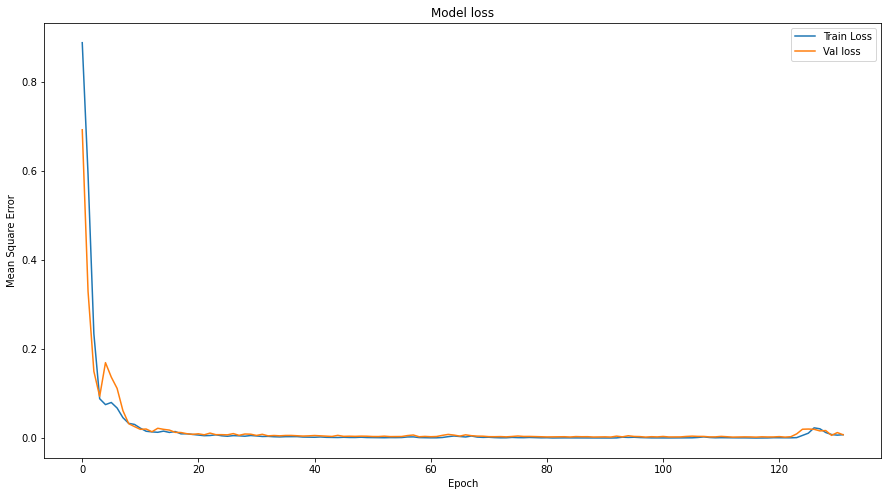

In [69]:
# show the graph of model loss in trainig and validation 

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history_1.epoch, history_1.history['loss'],
           label='Train Loss')
plt.plot(history_1.epoch, history_1.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()
plt.savefig('Figures/model_loss_1.png',dpi=1000,bbox_inches='tight')

In [70]:
#check the model performace in test dataset
score_1 = model_1.evaluate(X_test_1, y_test_1, verbose=1)
print('loss value: ', score_1[0])
print('Mean absolute error: ', score_1[1])



64/64 [==============================] - 0s 47us/sample - loss: 0.0175 - mean_absolute_error: 0.0987
loss value:  0.01750144362449646
Mean absolute error:  0.09869431


In [71]:
'''=== predict the house price ==='''

# predict house price using the test data 
test_predictions_1 = model_1.predict(X_test_1).flatten()
print(test_predictions_1)

mse = mean_squared_error(y_test,test_predictions_1)
r2 = r2_score(y_test, test_predictions_1, multioutput='uniform_average')
print("mse:", mse)
print("r2:", r2)

[ 1.7585367   0.6075665   1.5693905  -0.4975327   0.6488865   1.6074187
  1.7736647  -0.9952045   0.49191552  0.60664225 -0.9621706   0.7435916
 -0.7885422  -1.0466046  -0.8485415   1.4525326   1.853773    1.1571827
  0.50009453  0.3742276  -0.98208714 -0.75107604 -1.1533991  -0.9159105
 -0.95762056  1.2354046  -1.0718206   0.9460653   0.5207776  -0.9263464
  0.39190328 -0.8280316   1.3882012   1.8327883  -0.07362195 -1.039414
  2.0491505   0.892859   -0.48686504  2.053959    0.42862338 -0.34687763
  1.7677517  -0.7724289  -0.6249643  -0.95483696 -1.1326846  -0.5297361
  1.4203885   0.26305258 -1.057988    0.38598004 -0.89977753 -1.1791894
 -1.1069684   0.69057757  0.54864806 -0.5919614  -1.1799103  -0.6014783
  0.94269943  1.723819   -0.21345219  0.24284892]
mse: 0.017501449079838728
r2: 0.985832451957273


In [72]:
# show the true value and predicted value in dataframe
true_predicted_1 = pd.DataFrame(list(zip(y_test_1, test_predictions_1)), 
                    columns=['True Value','Predicted Value'])
true_predicted_1.head(10)

,True Value,Predicted Value
0,[1.9962017456503172],1.758537
1,[0.5514604154564543],0.607566
2,[1.5825364929879715],1.569391
3,[-0.7564215152247422],-0.497533
4,[0.5535184515393514],0.648887
5,[1.7533534878684431],1.607419
6,[1.8017173358165282],1.773665
7,[-1.0229371879599352],-0.995205
8,[0.4742840623478076],0.491916
9,[0.6625943639329053],0.606642


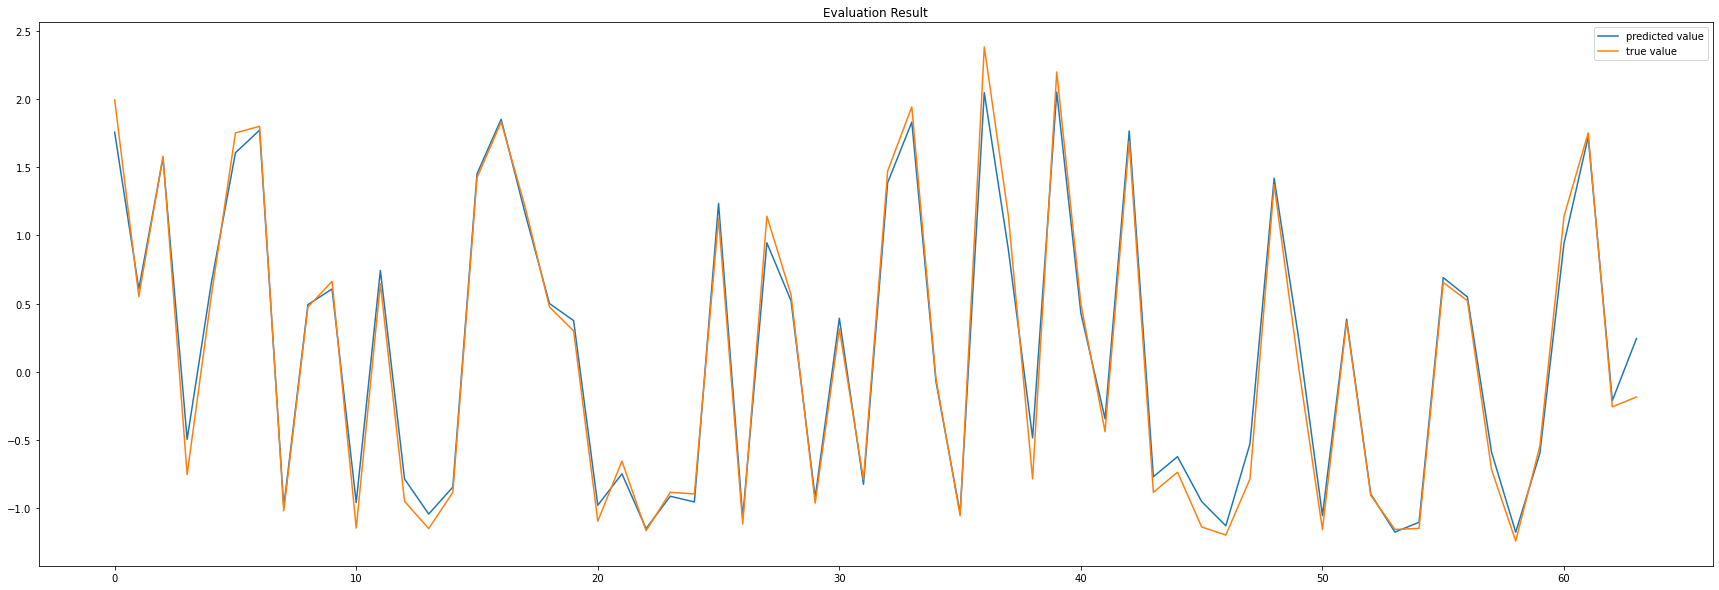

In [73]:
#visiulize the true value with predicted value (using line graph)
x_1 = test_predictions_1
y_1 = y_test_1
plt.figure(figsize=(30,10))
plt.plot(x_1, label='predicted value')
plt.plot(y_1, label='true value')
plt.title('Evaluation Result')
plt.legend()
plt.savefig('Evaluation_Result_1.png',dpi=1000,bbox_inches='tight')
plt.show()

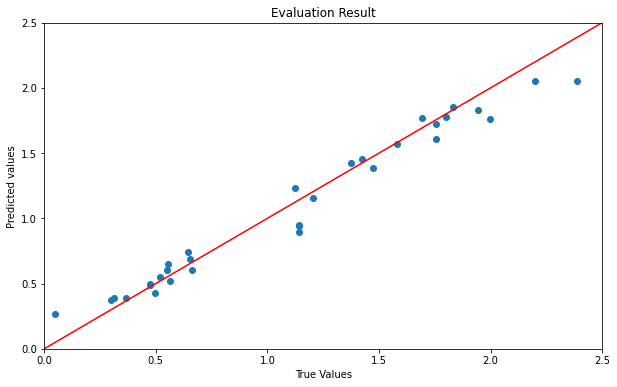

In [74]:
'''=== Visualize the model evaluation skill ==='''


# visualize the prediction uisng diagonal line
y_1 = test_predictions_1 #y-axis
x_1 = y_test_1 #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x_1,y_1) #scatter plots for x,y
ax.set(xlim=(0,2.5), ylim=(0, 2.5)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.savefig('x_Evaluation_Result_1.png',dpi=1000,bbox_inches='tight')
plt.show()

## subset_2

In [75]:
path = 'max_data/SixAirlinesDataV2.csv'
data_2 = pd.read_csv(path, sep = ',', na_filter = False)

data_2=data_2.drop(columns='Unnamed: 0')
data_2.head()

,Airline,Aircraft,FlightDuration,IsInternational,SeatsEconomy,SeatsPremium,PitchEconomy,PitchPremium,WidthEconomy,WidthPremium,PriceEconomy,PricePremium,PriceRelative,SeatsTotal,PitchDifference,WidthDifference,PercentPremiumSeats,month_num
0,0.089142,-0.693889,-0.817844,3.294215,-0.436182,-0.343385,1.220342,-2.215259,0.302148,-1.357472,-0.578401,-0.802415,0.06,-0.442612,-2.091811,-1.381970,0.009871,-1.639972
1,0.089142,-0.693889,-0.783876,3.294215,-1.029628,-1.147585,1.220342,-2.968588,-1.455802,-2.258698,-0.667926,-0.870953,0.07,-1.098823,-2.650559,-1.381970,-0.411592,-1.639972
2,0.648468,-0.693889,-1.199981,-0.303562,-0.554871,-1.878677,-1.818641,1.551387,-1.455802,1.346207,-1.010589,-1.018270,0.65,-0.794154,1.819422,1.912112,-2.053194,0.282340
3,0.089142,1.441153,-1.542489,3.294215,-1.108754,-1.147585,1.220342,-2.968588,-1.455802,-2.258698,-1.141274,-1.256183,0.09,-1.169131,-2.650559,-1.381970,-0.297797,0.282340
4,1.207793,-0.693889,-0.161134,-0.303562,-0.053740,-0.416494,1.220342,0.044729,-1.455802,-0.456246,1.630900,1.014233,0.07,-0.114507,-0.415569,0.265071,-0.457953,-0.678816


In [76]:
# variables seleccionadas según diferentes criterios  根据不同标准选择变量
Y = data_2[['PriceEconomy']].copy()
Y = Y.values
x_data_2 = [10,7,13,14,15,17]

data_2.drop(data_2.columns[x_data_2], axis=1, inplace=True)
X_2 = data_2.values

In [77]:
data_2.head()

,Airline,Aircraft,FlightDuration,IsInternational,SeatsEconomy,SeatsPremium,PitchEconomy,WidthEconomy,WidthPremium,PricePremium,PriceRelative,PercentPremiumSeats
0,0.089142,-0.693889,-0.817844,3.294215,-0.436182,-0.343385,1.220342,0.302148,-1.357472,-0.802415,0.06,0.009871
1,0.089142,-0.693889,-0.783876,3.294215,-1.029628,-1.147585,1.220342,-1.455802,-2.258698,-0.870953,0.07,-0.411592
2,0.648468,-0.693889,-1.199981,-0.303562,-0.554871,-1.878677,-1.818641,-1.455802,1.346207,-1.018270,0.65,-2.053194
3,0.089142,1.441153,-1.542489,3.294215,-1.108754,-1.147585,1.220342,-1.455802,-2.258698,-1.256183,0.09,-0.297797
4,1.207793,-0.693889,-0.161134,-0.303562,-0.053740,-0.416494,1.220342,-1.455802,-0.456246,1.014233,0.07,-0.457953


In [78]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale_2 = min_max_scaler.fit_transform(X_2)

In [79]:
# shuffle and split data into train (~80%) and test (~20%)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_scale_2, Y, 
                                                    test_size=0.2, random_state=42) 

print('training data shape: ',X_train_2.shape)
print('testing data shape: ',X_test_2.shape)

training data shape:  (256, 12)
testing data shape:  (64, 12)


In [80]:
#get number of columns in training data
n_cols_2 = X_train_2.shape[1]

# builds model
model_2 = keras.Sequential()

model_2.add(keras.layers.Dense(150, activation=tf.nn.relu, 
                       input_shape=(n_cols_2,)))
model_2.add(keras.layers.Dense(150, activation=tf.nn.relu))
model_2.add(keras.layers.Dense(150, activation=tf.nn.relu))
model_2.add(keras.layers.Dense(150, activation=tf.nn.relu))
model_2.add(keras.layers.Dense(150, activation=tf.nn.relu))
model_2.add(keras.layers.Dense(1))

#compile model
model_2.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

#inspect the model
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 150)               1950      
_________________________________________________________________
dense_43 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_44 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_45 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_46 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 151       
Total params: 92,701
Trainable params: 92,701
Non-trainable params: 0
__________________________________________________

In [81]:
t_beg = time.time()
#train model and perform validation test

early_stop_2 = EarlyStopping(monitor='val_loss', patience=15) # stops training when it doesn't show improvemnet.

history_2 = model_2.fit(X_train_2, y_train_2, epochs=300, 
          validation_split=0.2, verbose=1, callbacks=[early_stop_2])


selection_time = time.time() - t_beg
print(f"选择时间为: {selection_time:0.3f} s")

Train on 204 samples, validate on 52 samples
Epoch 1/300
204/204 [==============================] - 0s 1ms/sample - loss: 0.8400 - mean_absolute_error: 0.7773 - val_loss: 0.5838 - val_mean_absolute_error: 0.6254
Epoch 2/300
204/204 [==============================] - 0s 83us/sample - loss: 0.5086 - mean_absolute_error: 0.5980 - val_loss: 0.2784 - val_mean_absolute_error: 0.3920
Epoch 3/300
204/204 [==============================] - 0s 103us/sample - loss: 0.2187 - mean_absolute_error: 0.3484 - val_loss: 0.1593 - val_mean_absolute_error: 0.3032
Epoch 4/300
204/204 [==============================] - 0s 112us/sample - loss: 0.0992 - mean_absolute_error: 0.2396 - val_loss: 0.0853 - val_mean_absolute_error: 0.2228
Epoch 5/300
204/204 [==============================] - 0s 88us/sample - loss: 0.0639 - mean_absolute_error: 0.1986 - val_loss: 0.0496 - val_mean_absolute_error: 0.1732
Epoch 6/300
204/204 [==============================] - 0s 93us/sample - loss: 0.0347 - mean_absolute_error: 0.1428

204/204 [==============================] - 0s 73us/sample - loss: 0.0011 - mean_absolute_error: 0.0252 - val_loss: 0.0032 - val_mean_absolute_error: 0.0460
Epoch 50/300
204/204 [==============================] - 0s 64us/sample - loss: 0.0023 - mean_absolute_error: 0.0405 - val_loss: 0.0038 - val_mean_absolute_error: 0.0510
Epoch 51/300
204/204 [==============================] - 0s 64us/sample - loss: 0.0016 - mean_absolute_error: 0.0301 - val_loss: 0.0025 - val_mean_absolute_error: 0.0368
Epoch 52/300
204/204 [==============================] - 0s 64us/sample - loss: 0.0014 - mean_absolute_error: 0.0297 - val_loss: 0.0053 - val_mean_absolute_error: 0.0596
Epoch 53/300
204/204 [==============================] - 0s 64us/sample - loss: 0.0037 - mean_absolute_error: 0.0495 - val_loss: 0.0038 - val_mean_absolute_error: 0.0507
Epoch 54/300
204/204 [==============================] - 0s 64us/sample - loss: 0.0067 - mean_absolute_error: 0.0665 - val_loss: 0.0168 - val_mean_absolute_error: 0.1155

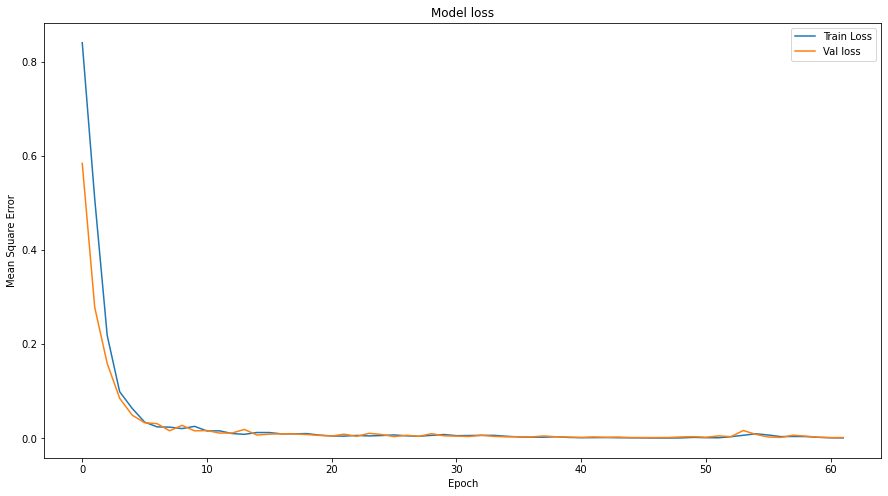

In [82]:
# show the graph of model loss in trainig and validation 

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history_2.epoch, history_2.history['loss'],
           label='Train Loss')
plt.plot(history_2.epoch, history_2.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()
plt.savefig('Figures/model_loss_2.png',dpi=1000,bbox_inches='tight')

In [83]:
#check the model performace in test dataset
score_2 = model_2.evaluate(X_test_2, y_test_2, verbose=1)
print('loss value: ', score_2[0])
print('Mean absolute error: ', score_2[1])

64/64 [==============================] - 0s 46us/sample - loss: 0.0070 - mean_absolute_error: 0.0546
loss value:  0.0069530324544757605
Mean absolute error:  0.054641232


In [84]:
'''=== predict the house price ==='''

# predict house price using the test data 
test_predictions_2 = model_2.predict(X_test_2).flatten()
print(test_predictions_2)

mse = mean_squared_error(y_test,test_predictions_2)
r2 = r2_score(y_test, test_predictions_2, multioutput='uniform_average')
print("mse:", mse)
print("r2:", r2)

[ 2.0048928   0.5506996   1.5962662  -0.7249361   0.6245738   1.7860892
  1.8729442  -1.0359292   0.48405313  0.6114188  -1.0346129   0.7794238
 -0.9920986  -1.140806   -0.8588245   1.4704567   1.7945418   1.2358938
  0.48405313  0.31344882 -1.116217   -0.9635143  -1.1963279  -0.9348714
 -0.98655826  1.2884948  -1.1226119   1.0586585   0.5842367  -0.93741405
  0.35595816 -0.78545797  1.5031729   1.9461349  -0.03692055 -1.0931671
  2.2514677   1.0586585  -0.6457548   2.2086666   0.49354294 -0.44201747
  1.9906154  -0.8588245  -0.6927294  -1.0167466  -1.2116295  -0.6457548
  1.4316876   0.07649995 -1.1211329   0.38806462 -1.0063369  -1.1816263
 -1.1655191   0.7059866   0.55166584 -0.7159039  -1.2489026  -0.60623485
  1.0586585   1.78325    -0.2139385   0.01535894]
mse: 0.006953030905542477
r2: 0.9943714718165642


In [85]:
# show the true value and predicted value in dataframe
true_predicted_2 = pd.DataFrame(list(zip(y_test_2, test_predictions_2)), 
                    columns=['True Value','Predicted Value'])
true_predicted_2.head(10)


,True Value,Predicted Value
0,[1.9962017456503172],2.004893
1,[0.5514604154564543],0.550700
2,[1.5825364929879715],1.596266
3,[-0.7564215152247422],-0.724936
4,[0.5535184515393514],0.624574
5,[1.7533534878684431],1.786089
6,[1.8017173358165282],1.872944
7,[-1.0229371879599352],-1.035929
8,[0.4742840623478076],0.484053
9,[0.6625943639329053],0.611419


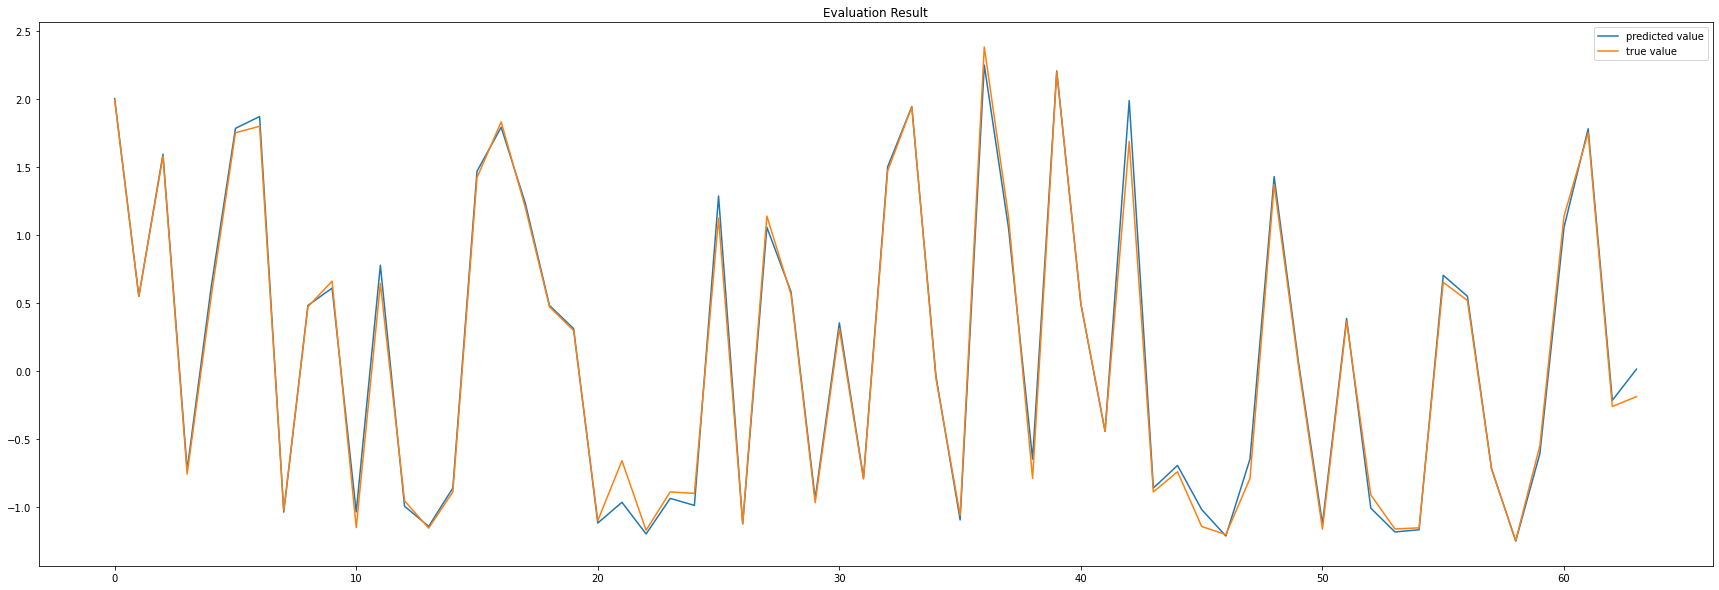

In [86]:
#visiulize the true value with predicted value (using line graph)
x_2 = test_predictions_2
y_2 = y_test_2
plt.figure(figsize=(30,10))
plt.plot(x_2, label='predicted value')
plt.plot(y_2, label='true value')
plt.title('Evaluation Result')
plt.legend()
plt.savefig('Evaluation_Result_2.png',dpi=1000,bbox_inches='tight')
plt.show()

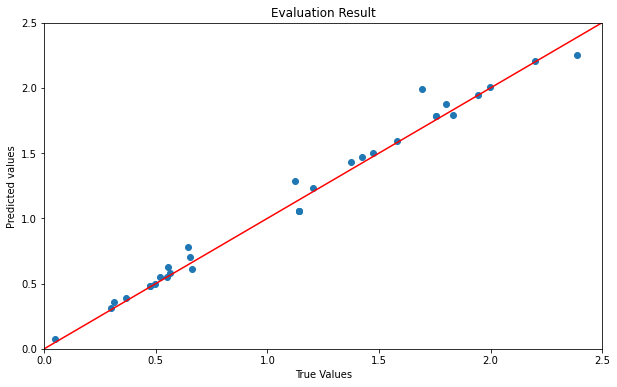

In [87]:
'''=== Visualize the model evaluation skill ==='''


# visualize the prediction uisng diagonal line
y_2 = test_predictions_2 #y-axis
x_2 = y_test_2 #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x_2,y_2) #scatter plots for x,y
ax.set(xlim=(0,2.5), ylim=(0, 2.5)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.savefig('x_Evaluation_Result_2.png',dpi=1000,bbox_inches='tight')
plt.show()

## subset_3

In [88]:
path = 'max_data/SixAirlinesDataV2.csv'
data_3 = pd.read_csv(path, sep = ',', na_filter = False)

data_3=data_3.drop(columns='Unnamed: 0')
data_3.head()

,Airline,Aircraft,FlightDuration,IsInternational,SeatsEconomy,SeatsPremium,PitchEconomy,PitchPremium,WidthEconomy,WidthPremium,PriceEconomy,PricePremium,PriceRelative,SeatsTotal,PitchDifference,WidthDifference,PercentPremiumSeats,month_num
0,0.089142,-0.693889,-0.817844,3.294215,-0.436182,-0.343385,1.220342,-2.215259,0.302148,-1.357472,-0.578401,-0.802415,0.06,-0.442612,-2.091811,-1.381970,0.009871,-1.639972
1,0.089142,-0.693889,-0.783876,3.294215,-1.029628,-1.147585,1.220342,-2.968588,-1.455802,-2.258698,-0.667926,-0.870953,0.07,-1.098823,-2.650559,-1.381970,-0.411592,-1.639972
2,0.648468,-0.693889,-1.199981,-0.303562,-0.554871,-1.878677,-1.818641,1.551387,-1.455802,1.346207,-1.010589,-1.018270,0.65,-0.794154,1.819422,1.912112,-2.053194,0.282340
3,0.089142,1.441153,-1.542489,3.294215,-1.108754,-1.147585,1.220342,-2.968588,-1.455802,-2.258698,-1.141274,-1.256183,0.09,-1.169131,-2.650559,-1.381970,-0.297797,0.282340
4,1.207793,-0.693889,-0.161134,-0.303562,-0.053740,-0.416494,1.220342,0.044729,-1.455802,-0.456246,1.630900,1.014233,0.07,-0.114507,-0.415569,0.265071,-0.457953,-0.678816


In [89]:
# variables seleccionadas según diferentes criterios  根据不同标准选择变量
Y = data_3[['PriceEconomy']].copy()
Y = Y.values

x_data_3 = [10,7,15,13,14,17,0,1,8,9,16]

data_3.drop(data_3.columns[x_data_3], axis=1, inplace=True)
X_3 = data_3.values

In [90]:
data_3.head()

,FlightDuration,IsInternational,SeatsEconomy,SeatsPremium,PitchEconomy,PricePremium,PriceRelative
0,-0.817844,3.294215,-0.436182,-0.343385,1.220342,-0.802415,0.06
1,-0.783876,3.294215,-1.029628,-1.147585,1.220342,-0.870953,0.07
2,-1.199981,-0.303562,-0.554871,-1.878677,-1.818641,-1.018270,0.65
3,-1.542489,3.294215,-1.108754,-1.147585,1.220342,-1.256183,0.09
4,-0.161134,-0.303562,-0.053740,-0.416494,1.220342,1.014233,0.07


In [91]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale_3 = min_max_scaler.fit_transform(X_3)

In [92]:
# shuffle and split data into train (~80%) and test (~20%)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_scale_3, Y, 
                                                    test_size=0.2, random_state=42) 

print('training data shape: ',X_train_3.shape)
print('testing data shape: ',X_test_3.shape)

training data shape:  (256, 7)
testing data shape:  (64, 7)


In [93]:
#get number of columns in training data
n_cols_3 = X_train_3.shape[1]

# builds model
model_3 = keras.Sequential()

model_3.add(keras.layers.Dense(150, activation=tf.nn.relu, 
                       input_shape=(n_cols_3,)))
model_3.add(keras.layers.Dense(150, activation=tf.nn.relu))
model_3.add(keras.layers.Dense(150, activation=tf.nn.relu))
model_3.add(keras.layers.Dense(150, activation=tf.nn.relu))
model_3.add(keras.layers.Dense(150, activation=tf.nn.relu))
model_3.add(keras.layers.Dense(1))

#compile model
model_3.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

#inspect the model
model_3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 150)               1200      
_________________________________________________________________
dense_49 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_50 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_51 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_52 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 151       
Total params: 91,951
Trainable params: 91,951
Non-trainable params: 0
__________________________________________________

In [94]:
t_beg = time.time()
#train model and perform validation test

early_stop_3 = EarlyStopping(monitor='val_loss', patience=15) # stops training when it doesn't show improvemnet.

history_3 = model_3.fit(X_train_3, y_train_3, epochs=300, 
          validation_split=0.2, verbose=1, callbacks=[early_stop_3])



selection_time = time.time() - t_beg
print(f"选择时间为: {selection_time:0.3f} s")

Train on 204 samples, validate on 52 samples
Epoch 1/300
204/204 [==============================] - 0s 2ms/sample - loss: 0.8866 - mean_absolute_error: 0.7986 - val_loss: 0.6693 - val_mean_absolute_error: 0.6751
Epoch 2/300
204/204 [==============================] - 0s 93us/sample - loss: 0.5791 - mean_absolute_error: 0.6423 - val_loss: 0.2945 - val_mean_absolute_error: 0.4237
Epoch 3/300
204/204 [==============================] - 0s 93us/sample - loss: 0.2362 - mean_absolute_error: 0.3998 - val_loss: 0.1517 - val_mean_absolute_error: 0.3314
Epoch 4/300
204/204 [==============================] - 0s 88us/sample - loss: 0.1205 - mean_absolute_error: 0.2790 - val_loss: 0.0490 - val_mean_absolute_error: 0.1752
Epoch 5/300
204/204 [==============================] - 0s 103us/sample - loss: 0.0474 - mean_absolute_error: 0.1667 - val_loss: 0.0282 - val_mean_absolute_error: 0.1239
Epoch 6/300
204/204 [==============================] - 0s 93us/sample - loss: 0.0430 - mean_absolute_error: 0.1689 

Epoch 49/300
204/204 [==============================] - 0s 93us/sample - loss: 8.3985e-04 - mean_absolute_error: 0.0219 - val_loss: 7.3774e-04 - val_mean_absolute_error: 0.0156
Epoch 50/300
204/204 [==============================] - 0s 93us/sample - loss: 4.8978e-04 - mean_absolute_error: 0.0136 - val_loss: 6.6564e-04 - val_mean_absolute_error: 0.0156
Epoch 51/300
204/204 [==============================] - 0s 103us/sample - loss: 4.2239e-04 - mean_absolute_error: 0.0115 - val_loss: 7.0514e-04 - val_mean_absolute_error: 0.0152
Epoch 52/300
204/204 [==============================] - 0s 93us/sample - loss: 5.8577e-04 - mean_absolute_error: 0.0129 - val_loss: 7.6172e-04 - val_mean_absolute_error: 0.0184
Epoch 53/300
204/204 [==============================] - 0s 103us/sample - loss: 5.6431e-04 - mean_absolute_error: 0.0150 - val_loss: 7.9842e-04 - val_mean_absolute_error: 0.0184
Epoch 54/300
204/204 [==============================] - 0s 98us/sample - loss: 9.1835e-04 - mean_absolute_error: 

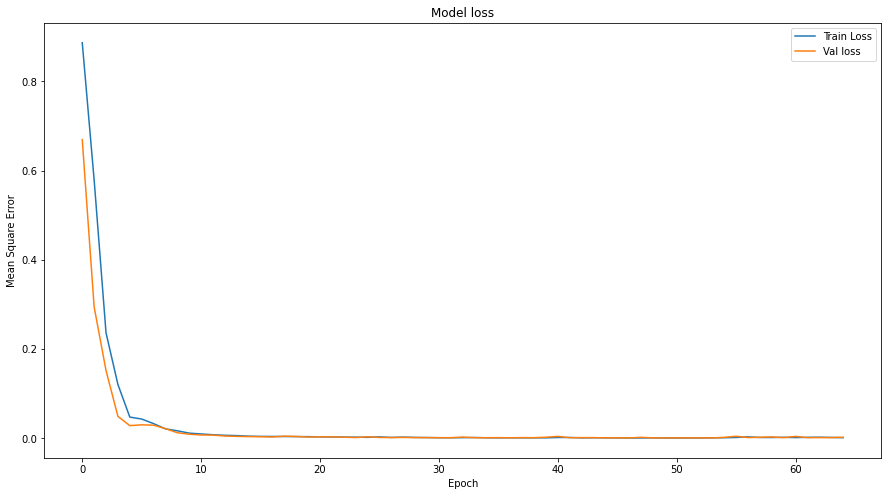

In [95]:
# show the graph of model loss in trainig and validation 

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history_3.epoch, history_3.history['loss'],
           label='Train Loss')
plt.plot(history_3.epoch, history_3.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()
plt.savefig('Figures/model_loss_3.png',dpi=1000,bbox_inches='tight')

In [96]:
#check the model performace in test dataset
score_3 = model_3.evaluate(X_test_3, y_test_3, verbose=1)
print('loss value: ', score_3[0])
print('Mean absolute error: ', score_3[1])

64/64 [==============================] - 0s 62us/sample - loss: 0.0034 - mean_absolute_error: 0.0424
loss value:  0.0034022991312667727
Mean absolute error:  0.04244045


In [97]:
'''=== predict the house price ==='''

# predict house price using the test data 
test_predictions_3 = model_3.predict(X_test_3).flatten()
print(test_predictions_3)

mse = mean_squared_error(y_test,test_predictions_3)
r2 = r2_score(y_test, test_predictions_3, multioutput='uniform_average')
print("mse:", mse)
print("r2:", r2)

[ 1.976364    0.5267484   1.5268847  -0.763685    0.533416    1.7308425
  1.8178285  -1.0444328   0.4582814   0.63873476 -1.002149    0.6321442
 -0.92102283 -1.1668861  -0.86233014  1.3819098   1.7577186   1.1609415
  0.4582814   0.2913937  -1.1539693  -0.8926253  -1.2090516  -0.90667975
 -0.9841534   1.105032   -1.165548    1.1302179   0.528733   -1.0094354
  0.28360942 -0.8552994   1.4560171   1.8918782  -0.0849212  -1.1029598
  2.3339233   1.1302179  -0.8014264   2.1950426   0.45073017 -0.4501738
  1.865526   -0.86233014 -0.77491933 -1.0256363  -1.2410785  -0.8014264
  1.3316351  -0.03185108 -1.1890943   0.3344393  -1.0082017  -1.2158221
 -1.1985903   0.64148283  0.4788455  -0.7354887  -1.3024578  -0.59127414
  1.1302179   1.7286785  -0.33892936 -0.21624567]
mse: 0.0034022998738183095
r2: 0.9972458139495654


In [98]:
# show the true value and predicted value in dataframe
true_predicted_3 = pd.DataFrame(list(zip(y_test_3, test_predictions_3)), 
                    columns=['True Value','Predicted Value'])
true_predicted_3.head(10)

,True Value,Predicted Value
0,[1.9962017456503172],1.976364
1,[0.5514604154564543],0.526748
2,[1.5825364929879715],1.526885
3,[-0.7564215152247422],-0.763685
4,[0.5535184515393514],0.533416
5,[1.7533534878684431],1.730842
6,[1.8017173358165282],1.817829
7,[-1.0229371879599352],-1.044433
8,[0.4742840623478076],0.458281
9,[0.6625943639329053],0.638735


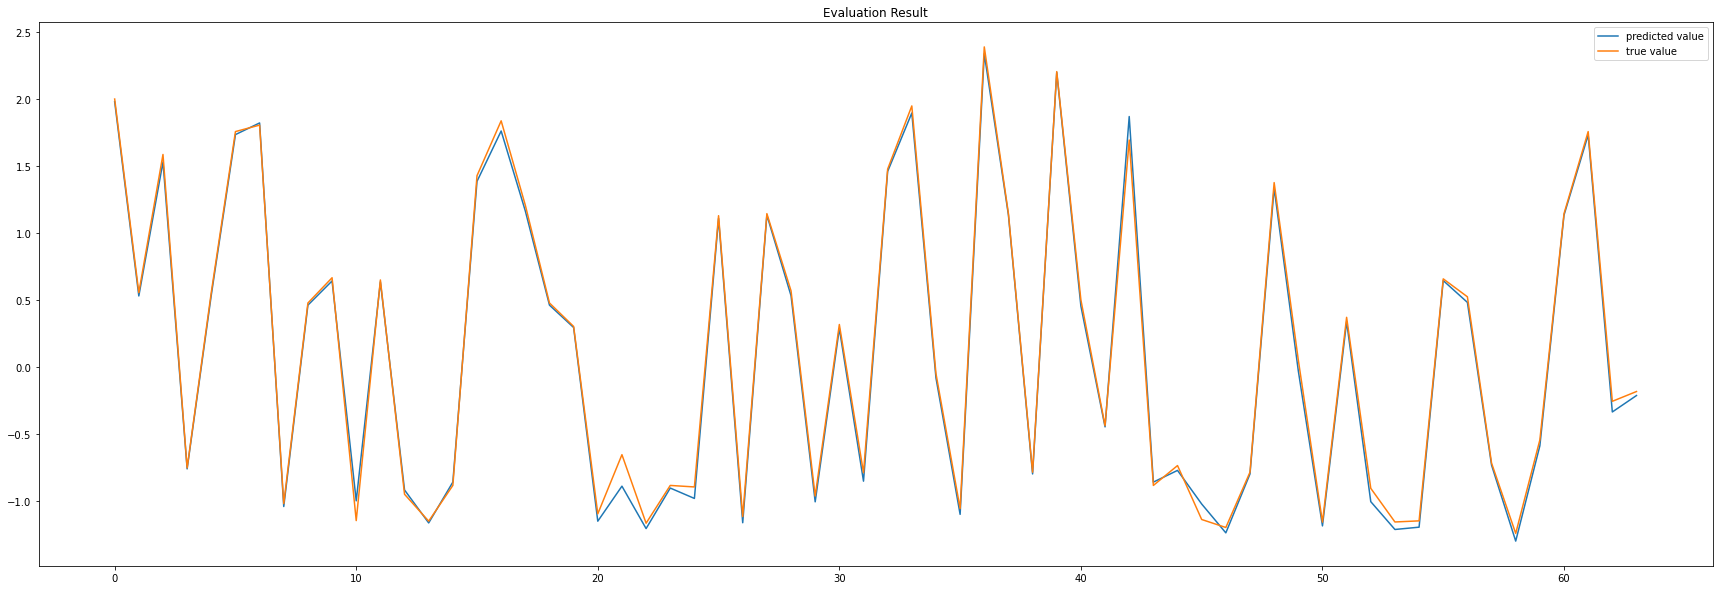

In [99]:
#visiulize the true value with predicted value (using line graph)
x_3 = test_predictions_3
y_3 = y_test_3
plt.figure(figsize=(30,10))
plt.plot(x_3, label='predicted value')
plt.plot(y_3, label='true value')
plt.title('Evaluation Result')
plt.legend()
plt.savefig('Evaluation_Result_3.png',dpi=1000,bbox_inches='tight')
plt.show()

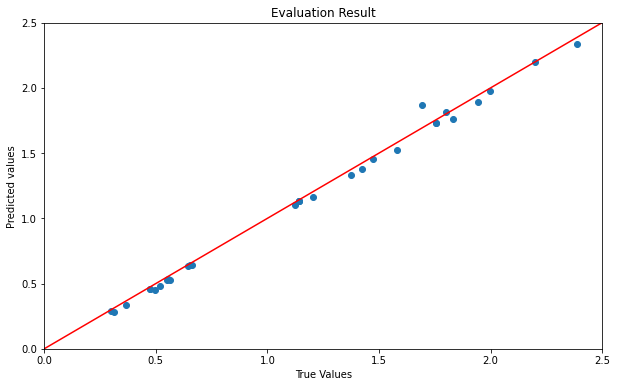

In [100]:
'''=== Visualize the model evaluation skill ==='''


# visualize the prediction uisng diagonal line
y_3 = test_predictions_3 #y-axis
x_3 = y_test_3 #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x_3,y_3) #scatter plots for x,y
ax.set(xlim=(0,2.5), ylim=(0, 2.5)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.savefig('x_Evaluation_Result_3.png',dpi=1000,bbox_inches='tight')
plt.show()

## subset_4

In [101]:
path = 'max_data/SixAirlinesDataV2.csv'
data_4 = pd.read_csv(path, sep = ',', na_filter = False)

data_4=data_4.drop(columns='Unnamed: 0')
data_4.head()

,Airline,Aircraft,FlightDuration,IsInternational,SeatsEconomy,SeatsPremium,PitchEconomy,PitchPremium,WidthEconomy,WidthPremium,PriceEconomy,PricePremium,PriceRelative,SeatsTotal,PitchDifference,WidthDifference,PercentPremiumSeats,month_num
0,0.089142,-0.693889,-0.817844,3.294215,-0.436182,-0.343385,1.220342,-2.215259,0.302148,-1.357472,-0.578401,-0.802415,0.06,-0.442612,-2.091811,-1.381970,0.009871,-1.639972
1,0.089142,-0.693889,-0.783876,3.294215,-1.029628,-1.147585,1.220342,-2.968588,-1.455802,-2.258698,-0.667926,-0.870953,0.07,-1.098823,-2.650559,-1.381970,-0.411592,-1.639972
2,0.648468,-0.693889,-1.199981,-0.303562,-0.554871,-1.878677,-1.818641,1.551387,-1.455802,1.346207,-1.010589,-1.018270,0.65,-0.794154,1.819422,1.912112,-2.053194,0.282340
3,0.089142,1.441153,-1.542489,3.294215,-1.108754,-1.147585,1.220342,-2.968588,-1.455802,-2.258698,-1.141274,-1.256183,0.09,-1.169131,-2.650559,-1.381970,-0.297797,0.282340
4,1.207793,-0.693889,-0.161134,-0.303562,-0.053740,-0.416494,1.220342,0.044729,-1.455802,-0.456246,1.630900,1.014233,0.07,-0.114507,-0.415569,0.265071,-0.457953,-0.678816


In [102]:
# variables seleccionadas según diferentes criterios  根据不同标准选择变量
Y = data_4[['PriceEconomy']].copy()
Y = Y.values

x_data_4 = [10,7,15,13,14,17,0,1,8,9,16,3,4,5,6]

data_4.drop(data_4.columns[x_data_4], axis=1, inplace=True)
X_4 = data_4.values

In [103]:
data_4.head()

,FlightDuration,PricePremium,PriceRelative
0,-0.817844,-0.802415,0.06
1,-0.783876,-0.870953,0.07
2,-1.199981,-1.018270,0.65
3,-1.542489,-1.256183,0.09
4,-0.161134,1.014233,0.07


In [104]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale_4 = min_max_scaler.fit_transform(X_4)

In [105]:
# shuffle and split data into train (~80%) and test (~20%)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_scale_4, Y, 
                                                    test_size=0.2, random_state=42) 

print('training data shape: ',X_train_4.shape)
print('testing data shape: ',X_test_4.shape)

training data shape:  (256, 3)
testing data shape:  (64, 3)


In [106]:
#get number of columns in training data
n_cols_4 = X_train_4.shape[1]

# builds model
model_4 = keras.Sequential()

model_4.add(keras.layers.Dense(150, activation=tf.nn.relu, 
                       input_shape=(n_cols_4,)))
model_4.add(keras.layers.Dense(150, activation=tf.nn.relu))
model_4.add(keras.layers.Dense(150, activation=tf.nn.relu))
model_4.add(keras.layers.Dense(150, activation=tf.nn.relu))
model_4.add(keras.layers.Dense(150, activation=tf.nn.relu))
model_4.add(keras.layers.Dense(1))

#compile model
model_4.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

#inspect the model
model_4.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 150)               600       
_________________________________________________________________
dense_55 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_56 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_57 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_58 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
__________________________________________________

In [107]:
t_beg = time.time()
#train model and perform validation test

early_stop_4 = EarlyStopping(monitor='val_loss', patience=15) # stops training when it doesn't show improvemnet.

history_4 = model_4.fit(X_train_4, y_train_4, epochs=300, 
          validation_split=0.2, verbose=1, callbacks=[early_stop_4])


selection_time = time.time() - t_beg
print(f"选择时间为: {selection_time:0.3f} s")

Train on 204 samples, validate on 52 samples
Epoch 1/300
204/204 [==============================] - 0s 2ms/sample - loss: 0.8628 - mean_absolute_error: 0.7878 - val_loss: 0.6483 - val_mean_absolute_error: 0.6702
Epoch 2/300
204/204 [==============================] - 0s 93us/sample - loss: 0.5260 - mean_absolute_error: 0.6023 - val_loss: 0.2374 - val_mean_absolute_error: 0.4039
Epoch 3/300
204/204 [==============================] - 0s 88us/sample - loss: 0.1471 - mean_absolute_error: 0.3008 - val_loss: 0.1487 - val_mean_absolute_error: 0.2732
Epoch 4/300
204/204 [==============================] - 0s 88us/sample - loss: 0.0981 - mean_absolute_error: 0.2336 - val_loss: 0.0744 - val_mean_absolute_error: 0.2116
Epoch 5/300
204/204 [==============================] - 0s 83us/sample - loss: 0.0734 - mean_absolute_error: 0.2012 - val_loss: 0.0867 - val_mean_absolute_error: 0.2506
Epoch 6/300
204/204 [==============================] - 0s 78us/sample - loss: 0.0480 - mean_absolute_error: 0.1702 -

204/204 [==============================] - 0s 64us/sample - loss: 4.8333e-04 - mean_absolute_error: 0.0171 - val_loss: 3.3123e-04 - val_mean_absolute_error: 0.0143
Epoch 49/300
204/204 [==============================] - 0s 63us/sample - loss: 3.6232e-04 - mean_absolute_error: 0.0143 - val_loss: 4.1226e-04 - val_mean_absolute_error: 0.0153
Epoch 50/300
204/204 [==============================] - 0s 59us/sample - loss: 3.6003e-04 - mean_absolute_error: 0.0145 - val_loss: 2.2238e-04 - val_mean_absolute_error: 0.0112
Epoch 51/300
204/204 [==============================] - 0s 64us/sample - loss: 2.4550e-04 - mean_absolute_error: 0.0117 - val_loss: 4.8908e-04 - val_mean_absolute_error: 0.0165
Epoch 52/300
204/204 [==============================] - 0s 73us/sample - loss: 2.9750e-04 - mean_absolute_error: 0.0124 - val_loss: 2.8287e-04 - val_mean_absolute_error: 0.0129
Epoch 53/300
204/204 [==============================] - 0s 63us/sample - loss: 2.9052e-04 - mean_absolute_error: 0.0123 - val_lo

204/204 [==============================] - 0s 59us/sample - loss: 7.3097e-04 - mean_absolute_error: 0.0220 - val_loss: 5.6654e-04 - val_mean_absolute_error: 0.0181
Epoch 95/300
204/204 [==============================] - 0s 64us/sample - loss: 6.5036e-04 - mean_absolute_error: 0.0205 - val_loss: 2.2218e-04 - val_mean_absolute_error: 0.0119
Epoch 96/300
204/204 [==============================] - 0s 59us/sample - loss: 2.0748e-04 - mean_absolute_error: 0.0110 - val_loss: 2.5066e-04 - val_mean_absolute_error: 0.0117
Epoch 97/300
204/204 [==============================] - 0s 68us/sample - loss: 2.2579e-04 - mean_absolute_error: 0.0115 - val_loss: 3.7274e-04 - val_mean_absolute_error: 0.0158
Epoch 98/300
204/204 [==============================] - 0s 59us/sample - loss: 2.5430e-04 - mean_absolute_error: 0.0135 - val_loss: 9.1933e-04 - val_mean_absolute_error: 0.0265
Epoch 99/300
204/204 [==============================] - 0s 63us/sample - loss: 4.0650e-04 - mean_absolute_error: 0.0161 - val_lo

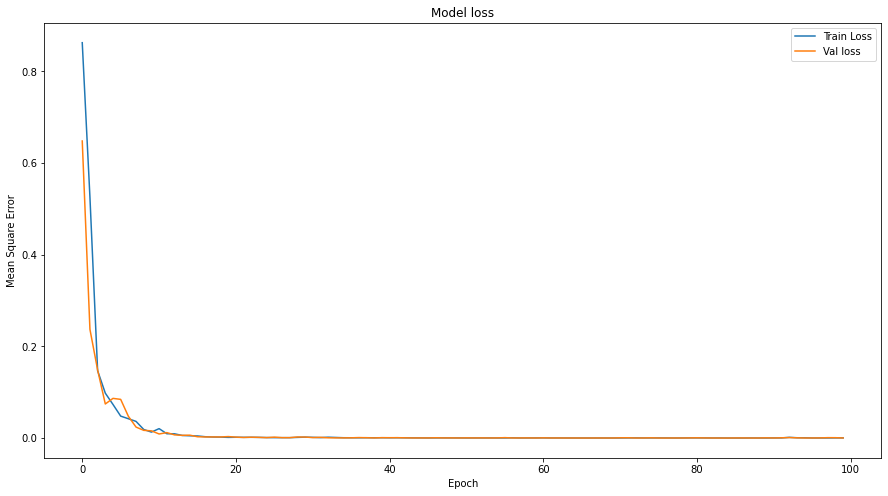

In [108]:
# show the graph of model loss in trainig and validation 

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history_4.epoch, history_4.history['loss'],
           label='Train Loss')
plt.plot(history_4.epoch, history_4.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()
plt.savefig('Figures/model_loss_4.png',dpi=1000,bbox_inches='tight')

In [109]:
#check the model performace in test dataset
score_4 = model_4.evaluate(X_test_4, y_test_4, verbose=1)
print('loss value: ', score_4[0])
print('Mean absolute error: ', score_4[1])

64/64 [==============================] - 0s 62us/sample - loss: 3.2835e-04 - mean_absolute_error: 0.0135
loss value:  0.00032834890589583665
Mean absolute error:  0.013530675


In [110]:
'''=== predict the house price ==='''

# predict house price using the test data 
test_predictions_4 = model_4.predict(X_test_4).flatten()
print(test_predictions_4)

mse = mean_squared_error(y_test,test_predictions_4)
r2 = r2_score(y_test, test_predictions_4, multioutput='uniform_average')
print("mse:", mse)
print("r2:", r2)

[ 1.998831    0.5496473   1.5958452  -0.741668    0.5298929   1.7563747
  1.8073763  -1.0027899   0.48317155  0.659146   -1.1214662   0.6437809
 -0.94878656 -1.1320469  -0.88056535  1.4287858   1.8108253   1.2034619
  0.48317155  0.3184194  -1.0946364  -0.64462733 -1.1285442  -0.87702364
 -0.88243085  1.1299165  -1.0982      1.1448276   0.5611115  -0.9768267
  0.3229073  -0.7713718   1.4769282   1.9652867  -0.04901306 -1.0305908
  2.3753862   1.1448276  -0.7790999   2.2012541   0.50297487 -0.42591617
  1.6300899  -0.88056535 -0.74342835 -1.1161257  -1.1618506  -0.7790999
  1.385846    0.03981936 -1.1586013   0.3654544  -0.88786006 -1.1138965
 -1.1219084   0.6619649   0.5327857  -0.70884407 -1.2133626  -0.5229244
  1.1448276   1.7557598  -0.25005063 -0.1673006 ]
mse: 0.00032835009931336877
r2: 0.9997341982492058


In [111]:
# show the true value and predicted value in dataframe
true_predicted_4 = pd.DataFrame(list(zip(y_test_4, test_predictions_4)), 
                    columns=['True Value','Predicted Value'])
true_predicted_4.head(10)

,True Value,Predicted Value
0,[1.9962017456503172],1.998831
1,[0.5514604154564543],0.549647
2,[1.5825364929879715],1.595845
3,[-0.7564215152247422],-0.741668
4,[0.5535184515393514],0.529893
5,[1.7533534878684431],1.756375
6,[1.8017173358165282],1.807376
7,[-1.0229371879599352],-1.002790
8,[0.4742840623478076],0.483172
9,[0.6625943639329053],0.659146


In [112]:
# show the true value and predicted value in dataframe
true_predicted_4 = pd.DataFrame(list(zip(y_test_4, test_predictions_4)), 
                    columns=['True Value','Predicted Value'])
true_predicted_4.head(10)

,True Value,Predicted Value
0,[1.9962017456503172],1.998831
1,[0.5514604154564543],0.549647
2,[1.5825364929879715],1.595845
3,[-0.7564215152247422],-0.741668
4,[0.5535184515393514],0.529893
5,[1.7533534878684431],1.756375
6,[1.8017173358165282],1.807376
7,[-1.0229371879599352],-1.002790
8,[0.4742840623478076],0.483172
9,[0.6625943639329053],0.659146


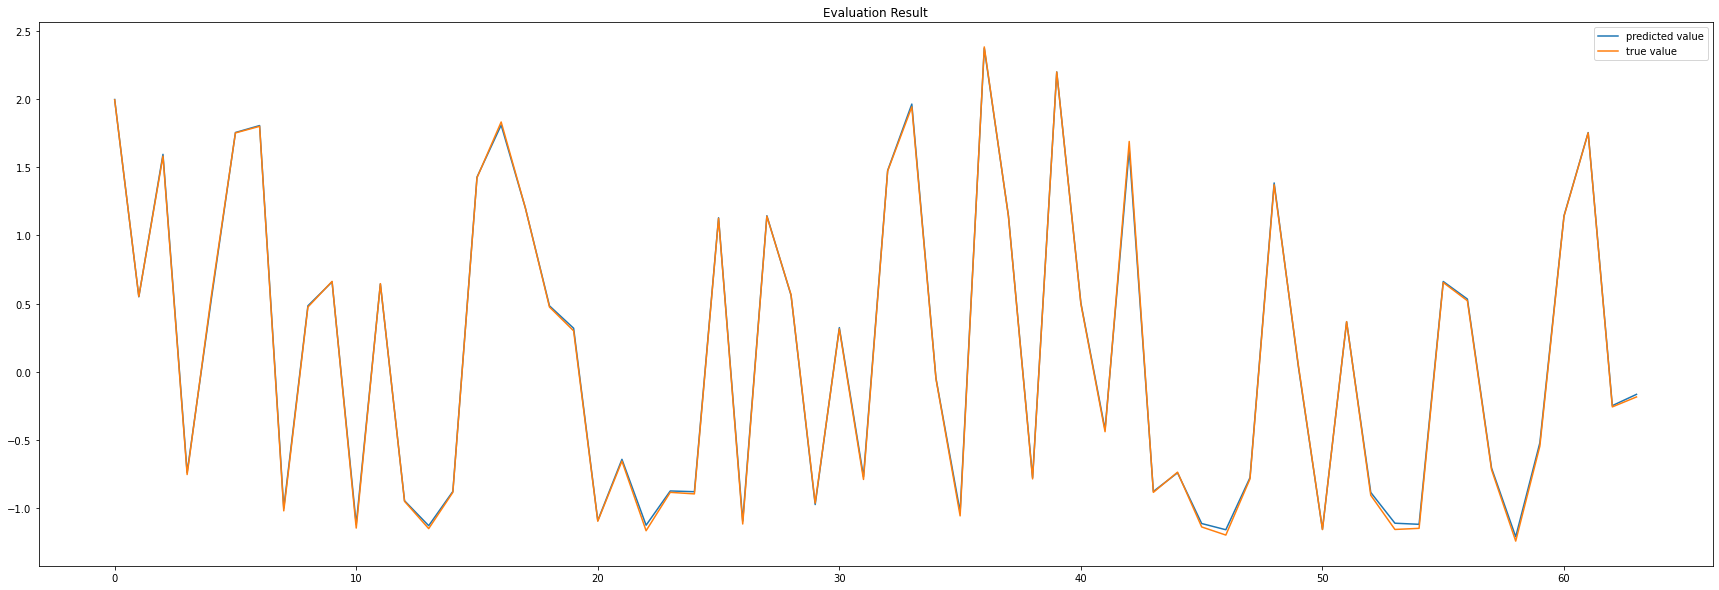

In [113]:
#visiulize the true value with predicted value (using line graph)
x_4 = test_predictions_4
y_4 = y_test_4
plt.figure(figsize=(30,10))
plt.plot(x_4, label='predicted value')
plt.plot(y_4, label='true value')
plt.title('Evaluation Result')
plt.legend()
plt.savefig('Evaluation_Result_4.png',dpi=1000,bbox_inches='tight')
plt.show()

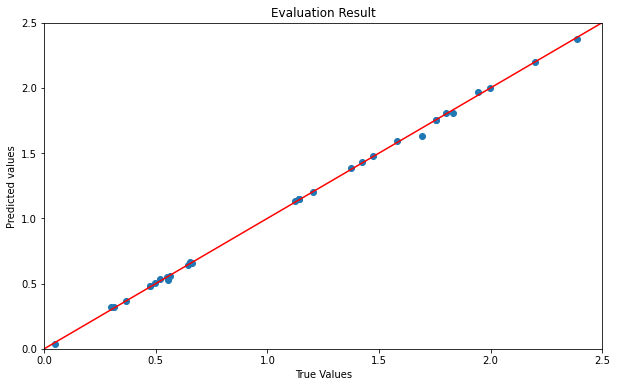

In [114]:
'''=== Visualize the model evaluation skill ==='''


# visualize the prediction uisng diagonal line
y_4 = test_predictions_4 #y-axis
x_4 = y_test_4 #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x_4,y_4) #scatter plots for x,y
ax.set(xlim=(0,2.5), ylim=(0, 2.5)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.savefig('x_Evaluation_Result_4.png',dpi=1000,bbox_inches='tight')
plt.show()

In [230]:

import PIL.Image as Image

import os

from PIL import Image
Image.MAX_IMAGE_PIXELS = None
 

IMAGES_PATH = 'D:\\Max_Jupyter\\b_max_end_1\\2019-11-14-Max_test\\Evaluation_Result\\'  # 图片集地址

IMAGES_FORMAT = ['.png', '.PNG']  # 图片格式

IMAGE_SIZE = 256  # 每张小图片的大小

IMAGE_ROW = 1  # 图片间隔，也就是合并成一张图后，一共有几行

IMAGE_COLUMN = 5  # 图片间隔，也就是合并成一张图后，一共有几列

IMAGE_SAVE_PATH = 'final.jpg'  # 图片转换后的地址

 

# 获取图片集地址下的所有图片名称

image_names = [name for name in os.listdir(IMAGES_PATH) for item in IMAGES_FORMAT if

               os.path.splitext(name)[1] == item]

 

# 简单的对于参数的设定和实际图片集的大小进行数量判断

if len(image_names) != IMAGE_ROW * IMAGE_COLUMN:
    print("image_names",image_names)
    print("IMAGE_ROW",IMAGE_ROW)
    print("IMAGE_COLUMN",IMAGE_COLUMN)

    raise ValueError("合成图片的参数和要求的数量不能匹配！")

 

# 定义图像拼接函数

def image_compose():

    to_image = Image.new('RGB', (IMAGE_COLUMN * IMAGE_SIZE, IMAGE_ROW * IMAGE_SIZE)) #创建一个新图

    # 循环遍历，把每张图片按顺序粘贴到对应位置上

    for y in range(1, IMAGE_ROW + 1):

        for x in range(1, IMAGE_COLUMN + 1):

            from_image = Image.open(IMAGES_PATH + image_names[IMAGE_COLUMN * (y - 1) + x - 1]).resize(

                (IMAGE_SIZE, IMAGE_SIZE),Image.ANTIALIAS)

            to_image.paste(from_image, ((x - 1) * IMAGE_SIZE, (y - 1) * IMAGE_SIZE))

    return to_image.save(IMAGE_SAVE_PATH) # 保存新图

image_compose() #调用函数


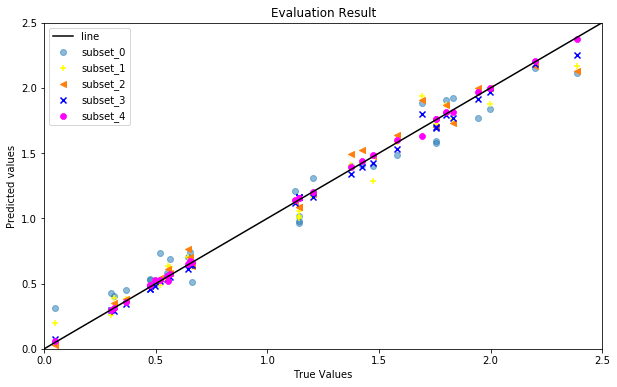

In [68]:
'''=== Visualize the model evaluation skill ==='''


# visualize the prediction uisng diagonal line
y = test_predictions #y-axis
x = y_test #x-axis
y_1 = test_predictions_1 #y-axis
x_1 = y_test_1 #x-axis
y_2 = test_predictions_2 #y-axis
x_2 = y_test_2 #x-axis
y_3 = test_predictions_3 #y-axis
x_3 = y_test_3 #x-axis
y_4 = test_predictions_4 #y-axis
x_4 = y_test_4 #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y,marker = 'o',alpha=0.5) #scatter plots for x,y   subset_0
ax.scatter(x_1,y_1,c='yellow',marker = '+') #scatter plots for x,y  subset_1  subset_2  subset_3   subset_4
ax.scatter(x_2,y_2,marker = '<') #scatter plots for x,y
ax.scatter(x_3,y_3,c='blue',marker = 'x') #scatter plots for x,y
ax.scatter(x_4,y_4,c='magenta',marker = '8') #scatter plots for x,y
ax.set(xlim=(0,2.5), ylim=(0, 2.5)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='black') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.legend(["line","subset_0","subset_1","subset_2","subset_3","subset_4"])
plt.title('Evaluation Result')
plt.savefig('x_Evaluation_Result_all.png',dpi=1000,bbox_inches='tight')
plt.show()

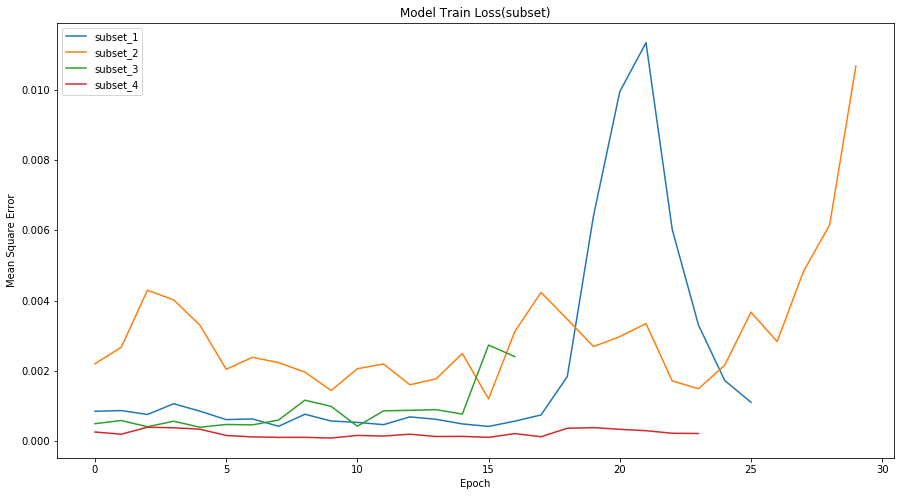

In [79]:
# show the graph of model loss in trainig and validation 

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')

# plt.plot(history.epoch, history.history['loss'],
#            label='subset_0')
plt.plot(history_1.epoch, history_1.history['loss'],
           label='subset_1')
plt.plot(history_2.epoch, history_2.history['loss'],
           label='subset_2')
plt.plot(history_3.epoch, history_3.history['loss'],
           label='subset_3')
plt.plot(history_4.epoch, history_4.history['loss'],
           label='subset_4')
# plt.plot(history_3.epoch, history_3.history['val_loss'],
#            label = 'Val loss')
# plt.title('Model Train Loss(subset)')
plt.title('Model Train Loss(subset)')
plt.legend()
plt.savefig('Figures/model_loss_trainloss_all.png',dpi=1000,bbox_inches='tight')

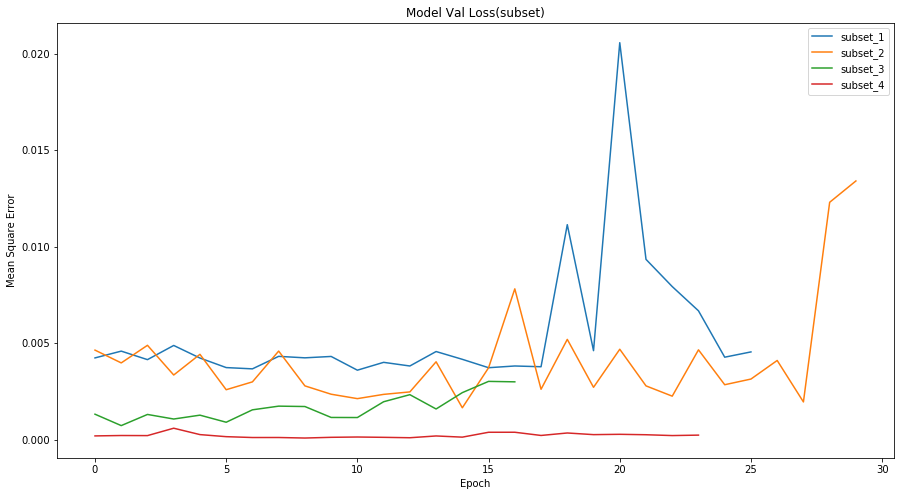

In [82]:
# show the graph of model loss in trainig and validation 

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')

# plt.plot(history.epoch, history.history['val_loss'],
#            label='subset_0')
plt.plot(history_1.epoch, history_1.history['val_loss'],
           label='subset_1')
plt.plot(history_2.epoch, history_2.history['val_loss'],
           label='subset_2')
plt.plot(history_3.epoch, history_3.history['val_loss'],
           label='subset_3')
plt.plot(history_4.epoch, history_4.history['val_loss'],
           label = 'subset_4')
# plt.plot(history_3.epoch, history_3.history['val_loss'],
#            label = 'Val loss')
# plt.title('Model Train Loss(subset)')
plt.title('Model Val Loss(subset)')
plt.legend()
plt.savefig('Figures/model_loss_valloss_all.png',dpi=1000,bbox_inches='tight')

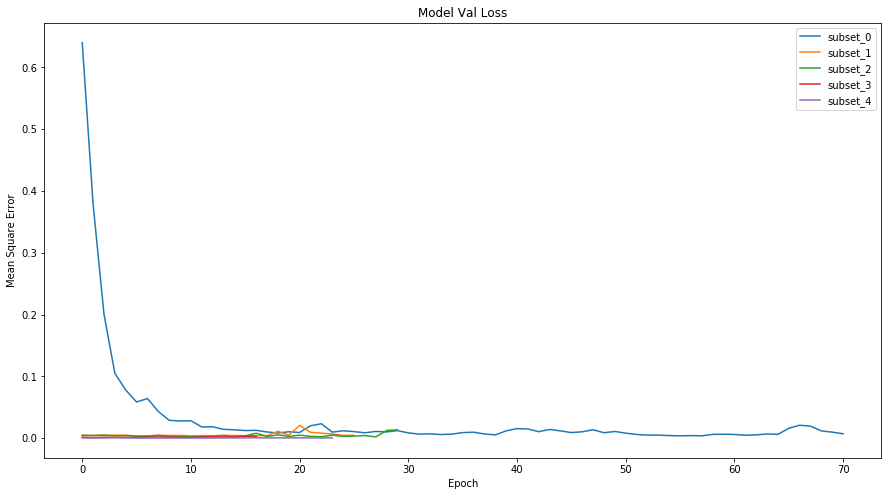

In [84]:
# show the graph of model loss in trainig and validation 

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')

plt.plot(history.epoch, history.history['val_loss'],
           label='subset_0')
plt.plot(history_1.epoch, history_1.history['val_loss'],
           label='subset_1')
plt.plot(history_2.epoch, history_2.history['val_loss'],
           label='subset_2')
plt.plot(history_3.epoch, history_3.history['val_loss'],
           label='subset_3')
plt.plot(history_4.epoch, history_4.history['val_loss'],
           label = 'subset_4')
# plt.plot(history_3.epoch, history_3.history['val_loss'],
#            label = 'Val loss')
# plt.title('Model Train Loss(subset)')
plt.title('Model Val Loss')
plt.legend()
plt.savefig('Figures/model_loss_valloss_all_1.png',dpi=1000,bbox_inches='tight')